# Problem Statement:
Have you ever wondered how many hotel bookings are canceled or what is the peak time for the hotel? This hotel booking dataset can help you explore these questions! This dataset comprehends bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

We have to build a Naive Bayes model to predict whether a hotel booking is canceled or not.

# Data Description:
hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel).

is_canceled: Value indicating if the booking was canceled (1) or not (0).

lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

arrival_date_year: Year of arrival date.

arrival_date_month: Month of arrival date.

arrival_date_week_number: Week number of year for arrival date.

arrival_date_day_of_month: Day of arrival date.

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

adults: Number of adults.

children: Number of children.

babies: Number of babies.

meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – 
Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).

country: Country of origin. Categories are represented in the ISO 3155–3:2013 format.

market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0).

previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking.

previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking.

reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.

deposit_type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

agent: ID of the travel agency that made the booking.

company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.

days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer.

customer_type: Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.

adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.

required_car_parking_spaces: Number of car parking spaces required by the customer.

total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor).

reservation_status: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.

reservation_status_date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when the booking was canceled or when the customer checked-out of the hotel.

# Tasks/Activities List:
Your code should contain the following activities/Analysis:

Read the hotel dataset.

Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, etc if any.

Analyze the categorical data.

Transform the categorical data using the One hot encoder or Label encoder.

Analyze the numerical data.

Transform the numerical data using the Power transform.

Finally scale the data.

Split the data into a train and test set.

Apply the Naive Bayes Model.

Evaluate the model using the performance metrics.

# Success Metrics:

Below are the metrics for the successful submission of this case study.

ROC AUC metric of the best model > 0.

# Import Libraries

In [1]:
#Importing the libraries which will be helpful for the data analysis. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

#  Data Preparation

In [2]:
#Importing the dataset which we will use for the modelling 
dataset = pd.read_csv('hotel.csv')

# Understand the Data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
len(dataset)

119390

In [5]:
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
len(dataset.columns)

32

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
dataset.duplicated().any()

True

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
dataset.shape

(87396, 32)

In [11]:
dataset['meal'].replace('Undefined','SC',inplace=True)

Since 'Undefined' and 'SC' possess same value i.e.,' no meal package'


# Exploratory Data Analysis

<Figure size 1500x200 with 0 Axes>

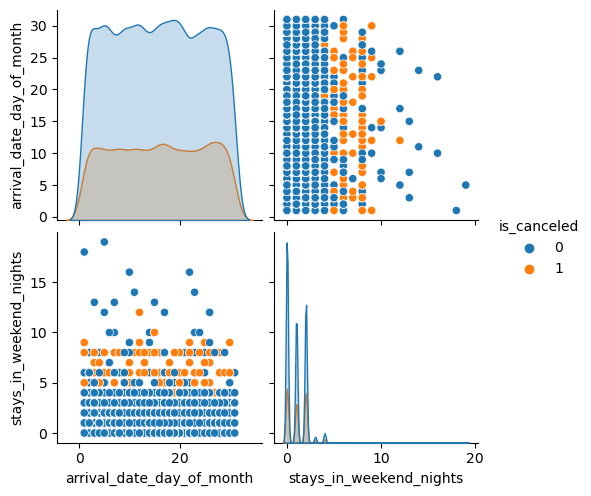

In [12]:
plt.figure(figsize=(15,2))
sns.pairplot(dataset[['hotel','arrival_date_day_of_month','stays_in_weekend_nights','is_canceled']], hue='is_canceled')
plt.show()

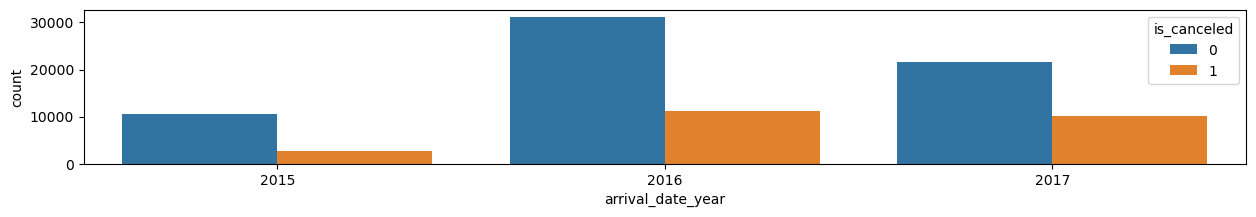

In [13]:
plt.figure(figsize=(15,2))
sns.countplot(data=dataset, x = 'arrival_date_year',hue='is_canceled')
plt.show()

There are more hotel booking cancellations in 2016 year.

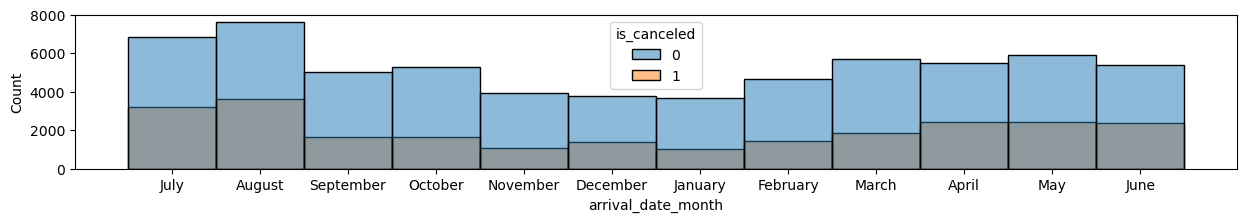

In [14]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'arrival_date_month',hue='is_canceled')
plt.show()

There are more hotel booking cancellations in the month of August

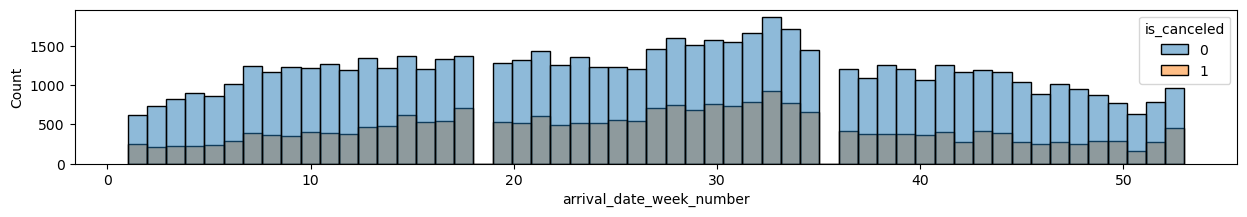

In [15]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'arrival_date_week_number',hue='is_canceled')
plt.show()

There are more hotel booking cancellations in week number 35

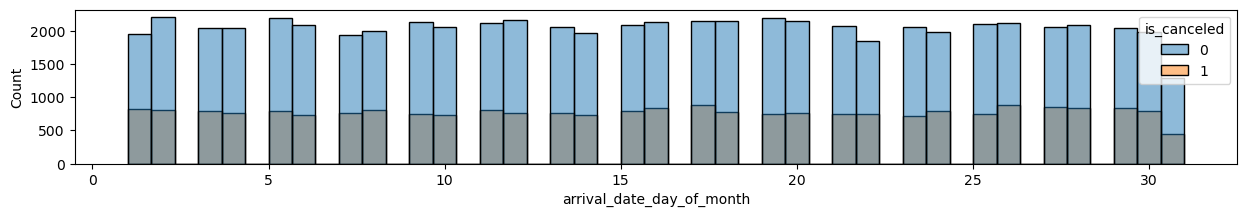

In [16]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'arrival_date_day_of_month',hue='is_canceled')
plt.show()

There are more hotel booking cancellations on 25th day of month.

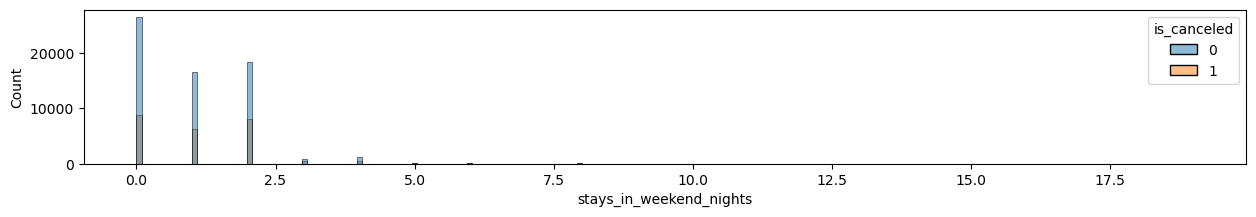

In [17]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'stays_in_weekend_nights',hue='is_canceled')
plt.show()

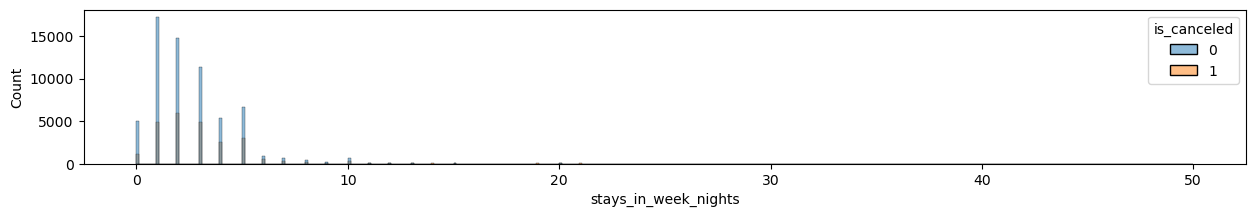

In [18]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'stays_in_week_nights',hue='is_canceled')
plt.show()

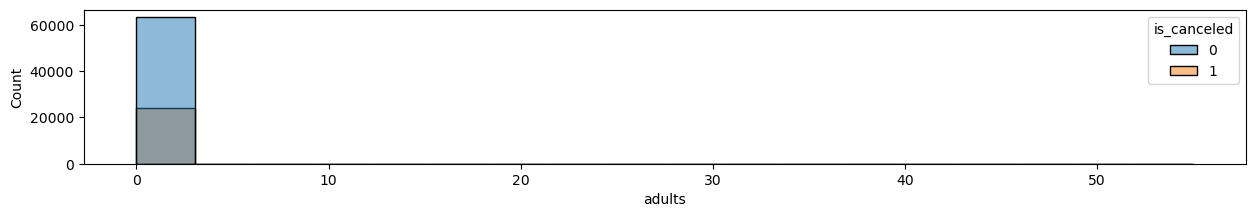

In [19]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'adults',hue='is_canceled')
plt.show()

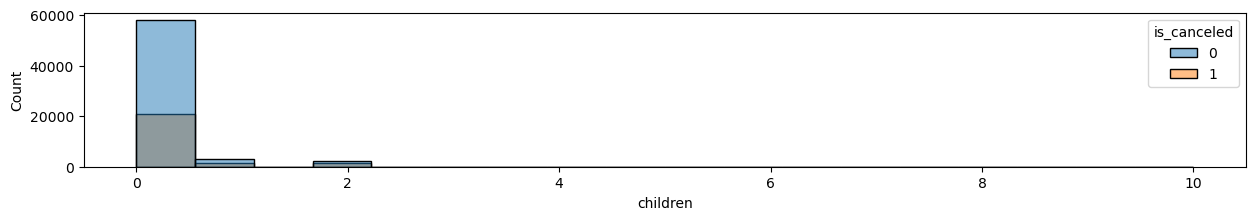

In [20]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'children',hue='is_canceled')
plt.show()

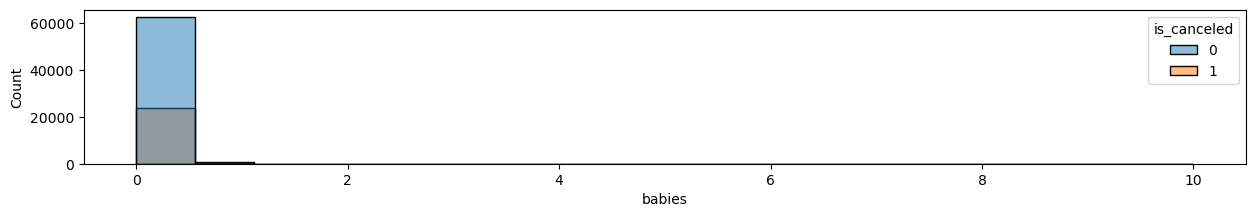

In [21]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'babies',hue='is_canceled')
plt.show()

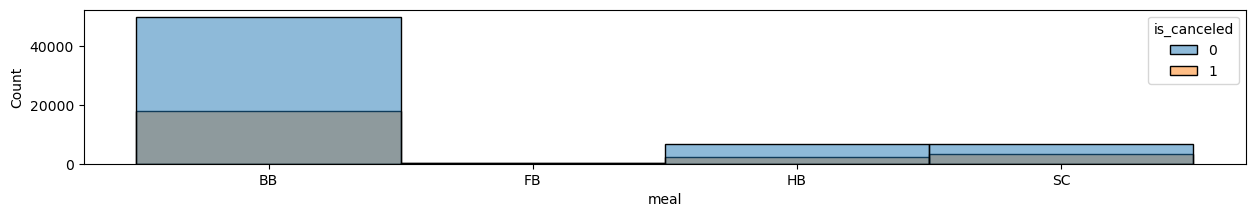

In [22]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'meal',hue='is_canceled')
plt.show()

BB meal has more hotel booking cancellation.

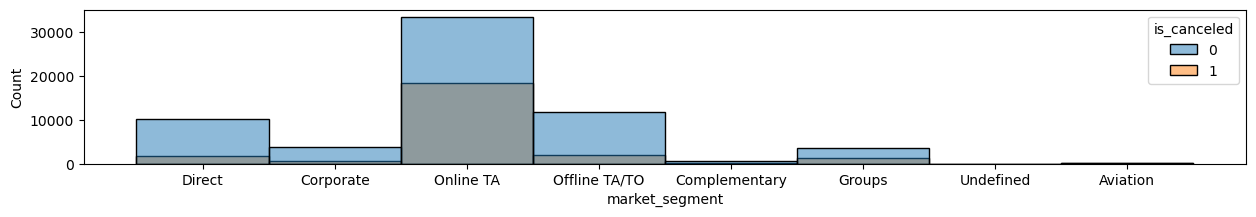

In [23]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'market_segment',hue='is_canceled')
plt.show()

Online TA market segment has more hotel booking cancellation.

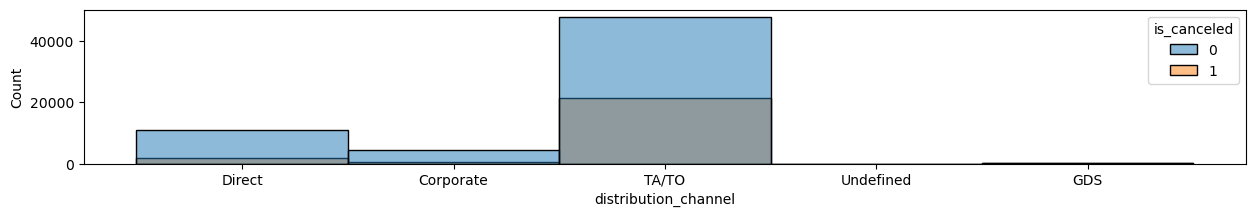

In [24]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'distribution_channel',hue='is_canceled')
plt.show()

TA/TO distribution channel has more hotel booking cancellation.

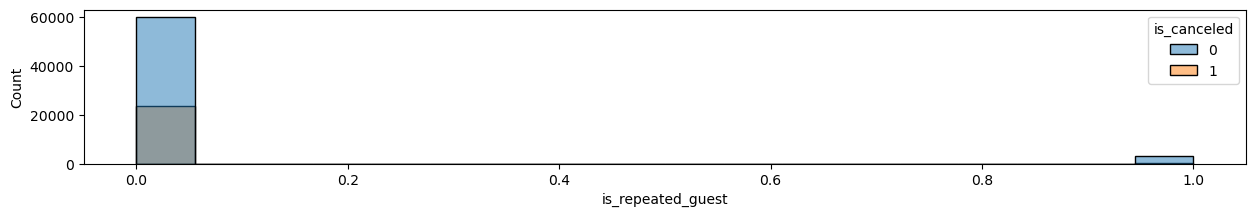

In [25]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'is_repeated_guest',hue='is_canceled')
plt.show()

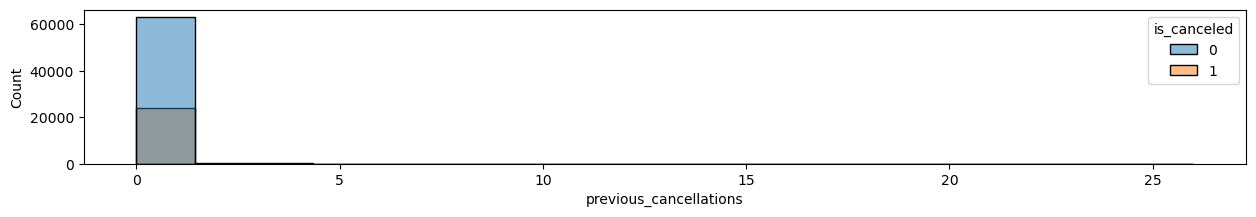

In [26]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'previous_cancellations',hue='is_canceled')
plt.show()

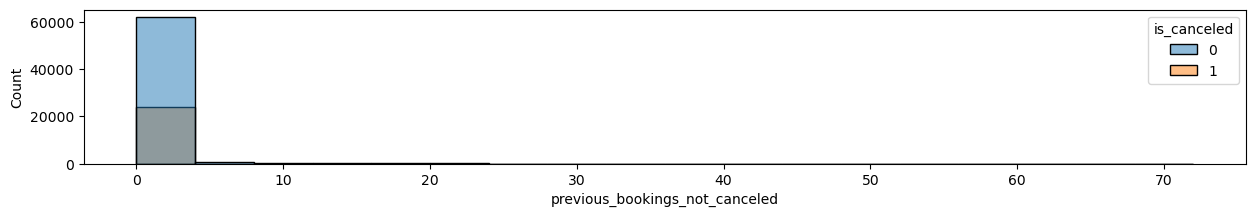

In [27]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'previous_bookings_not_canceled',hue='is_canceled')
plt.show()

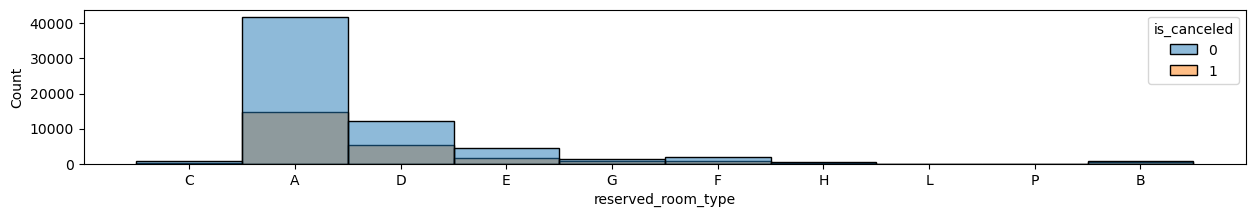

In [28]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'reserved_room_type',hue='is_canceled')
plt.show()

'A' reserved room type has more hotel booking cancellation and F reserved room type has less hotel booking cancellation.

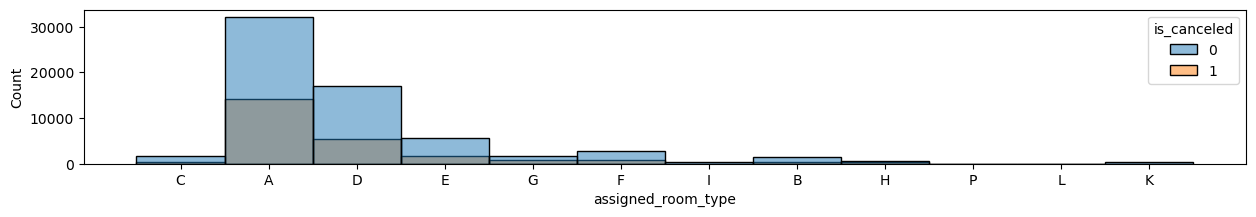

In [29]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'assigned_room_type',hue='is_canceled')
plt.show()

'A' assigned room type has more hotel booking cancellation

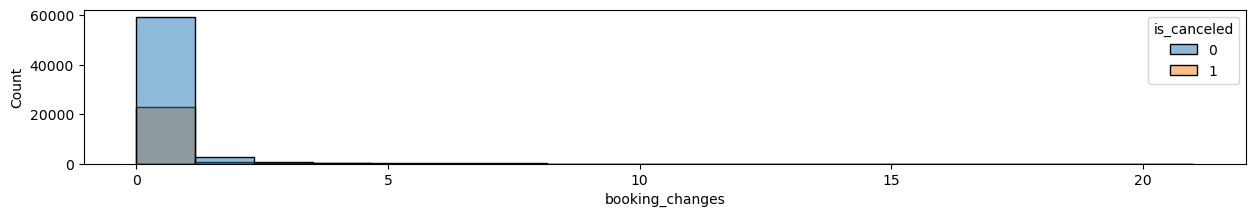

In [30]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'booking_changes',hue='is_canceled')
plt.show()

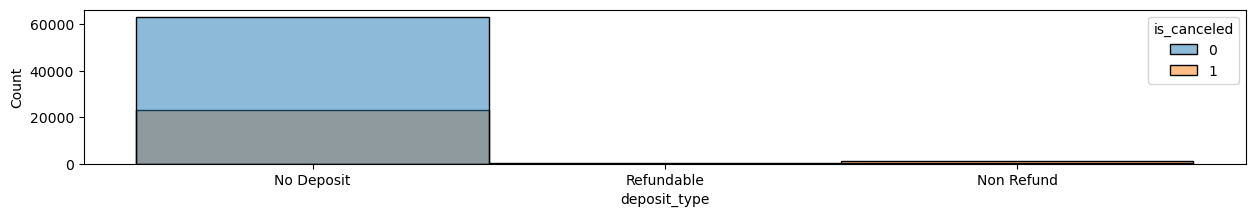

In [31]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'deposit_type',hue='is_canceled')
plt.show()

The deposit type No deposit have more hotel booking cancellations.

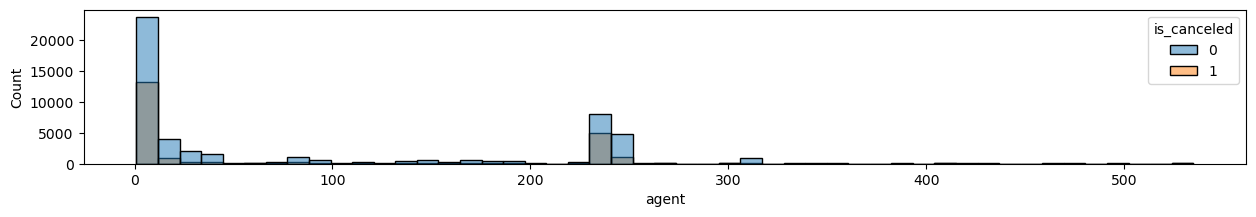

In [32]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'agent',hue='is_canceled')
plt.show()

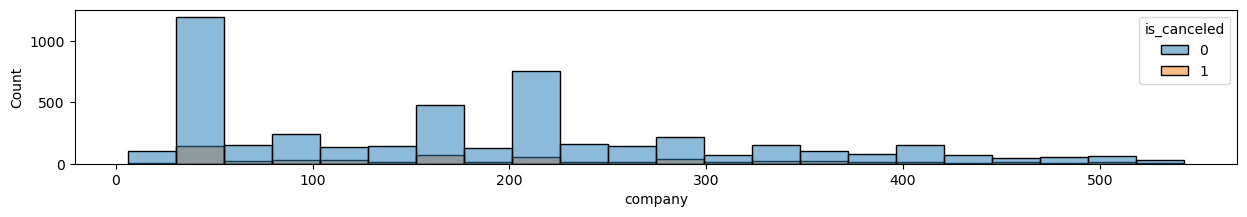

In [33]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'company',hue='is_canceled')
plt.show()

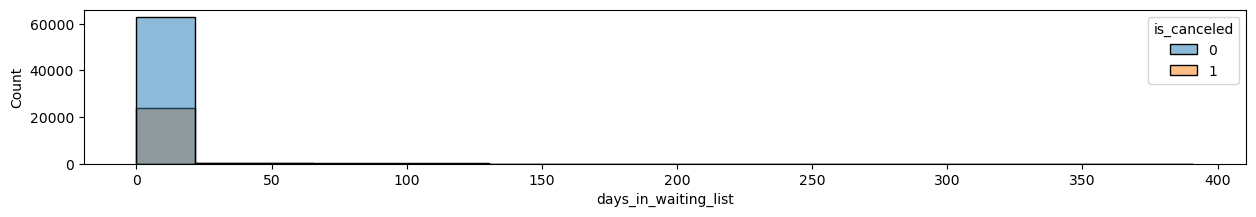

In [34]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'days_in_waiting_list',hue='is_canceled')
plt.show()

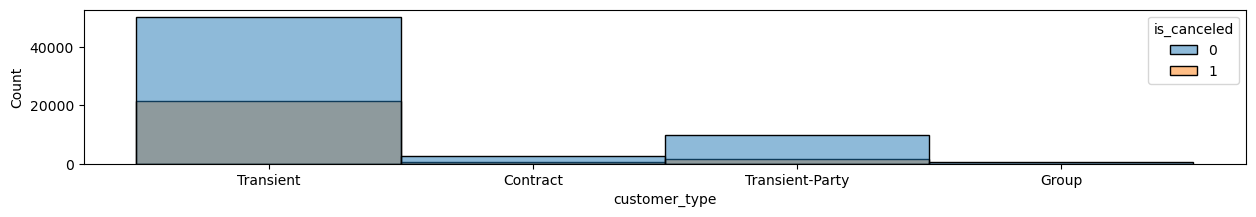

In [35]:
plt.figure(figsize=(15,2))
sns.histplot(data=dataset, x = 'customer_type',hue='is_canceled')
plt.show()

Transient customer type are having more hotel booking cancellations

# Missing Value Treatment

In [36]:
#Checking the count of the missing values percentage, there are very few missing values there in the dataset
dataset.isnull().sum()/len(dataset)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [37]:
dataset['company'].value_counts()

company
40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0       1
419.0      1
415.0      1
425.0      1
534.0      1
Name: count, Length: 352, dtype: int64

In [38]:
dataset.fillna(value='mode',inplace=True)

In [39]:
dataset['agent'].unique()

array(['mode', 304.0, 240.0, 303.0, 15.0, 241.0, 8.0, 250.0, 115.0, 5.0,
       175.0, 134.0, 156.0, 243.0, 242.0, 3.0, 105.0, 40.0, 147.0, 306.0,
       184.0, 96.0, 2.0, 127.0, 95.0, 146.0, 9.0, 177.0, 6.0, 143.0,
       244.0, 149.0, 167.0, 300.0, 171.0, 305.0, 67.0, 196.0, 152.0,
       142.0, 261.0, 104.0, 36.0, 26.0, 29.0, 258.0, 110.0, 71.0, 181.0,
       88.0, 251.0, 275.0, 69.0, 248.0, 208.0, 256.0, 314.0, 126.0, 281.0,
       273.0, 253.0, 185.0, 330.0, 334.0, 328.0, 326.0, 321.0, 324.0,
       313.0, 38.0, 155.0, 68.0, 335.0, 308.0, 332.0, 94.0, 348.0, 310.0,
       339.0, 375.0, 66.0, 327.0, 387.0, 298.0, 91.0, 245.0, 385.0, 257.0,
       393.0, 168.0, 405.0, 249.0, 315.0, 75.0, 128.0, 307.0, 11.0, 436.0,
       1.0, 201.0, 183.0, 223.0, 368.0, 336.0, 291.0, 464.0, 411.0, 481.0,
       10.0, 154.0, 468.0, 410.0, 390.0, 440.0, 495.0, 492.0, 493.0,
       434.0, 57.0, 531.0, 420.0, 483.0, 526.0, 472.0, 429.0, 16.0, 446.0,
       34.0, 78.0, 139.0, 252.0, 270.0, 47.0, 114.0, 3

In [40]:
def data_type(dataset):
    """
    Function to identify the numerical and categorical data columns
    :param dataset: Dataframe
    :return: list of numerical and categorical columns
    """
    numerical = []
    categorical = []
    for i in dataset.columns:
        if dataset[i].dtype == 'int64' or dataset[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(dataset)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    """
    Generates a list of binary columns in a dataframe.
    """
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(dataset)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

In [41]:
numerical

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'babies',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [42]:
len(categorical)

15

In [43]:
binary_cols

['is_canceled', 'is_repeated_guest']

In [44]:
# Function to Impute the missing values
def missing_value_imputation(dataset, numerical, categorical):
    """
    Function to automate the process of missing value imputation
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in numerical:
        dataset[i] = dataset[i].fillna(dataset[i].median())
    for i in categorical:
        dataset[i] = dataset[i].fillna(dataset[i].mode()[0])
    return dataset

dataset = missing_value_imputation(dataset, numerical, categorical)

In [45]:
dataset['is_canceled'].value_counts()

is_canceled
0    63371
1    24025
Name: count, dtype: int64

In [46]:
len(dataset.columns)

32

# Encoding and Feature Scaling

In [47]:
# Separating the numerical and categorical columns
from sklearn.preprocessing import StandardScaler,PowerTransformer

def encoding(dataset, categorical):
    """
    Function to automate the process of encoding the categorical data
    :param dataset: Dataframe
    :param categorical: List of categorical columns
    :return: Dataframe
    """
    for i in categorical:
        dataset[i] = dataset[i].astype('category')
        dataset[i] = dataset[i].cat.codes
    return dataset

dataset_cat = encoding(dataset, categorical)

In [48]:
dataset_cat['is_canceled'].value_counts()

is_canceled
0    63371
1    24025
Name: count, dtype: int64

In [49]:
dataset_cat.shape

(87396, 32)

In [50]:
dataset[categorical].shape

(87396, 15)

In [51]:
dataset_cat[categorical].shape

(87396, 15)

In [52]:
dataset_cat.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [53]:
def feature_scaling(dataset, numerical):
    """
    Function to automate the process of feature scaling the numerical data
    :param dataset: Dataframe
    :param numerical: List of numerical columns
    :return: Dataframe
    """
    sc_x = StandardScaler()
    dataset[numerical] = sc_x.fit_transform(dataset[numerical])
    return dataset

dataset_num = feature_scaling(dataset, numerical)

In [54]:
dataset_num['is_canceled'].value_counts()

is_canceled
0    63371
1    24025
Name: count, dtype: int64

In [55]:
len(dataset[numerical].columns)

15

In [56]:
len(dataset[categorical].columns)

15

In [57]:
len(dataset[binary_cols].columns)

2

In [58]:
power_transformer = PowerTransformer()
dataset_pt = power_transformer.fit_transform(dataset[numerical])
dataset_pt= pd.DataFrame(dataset,columns=dataset[numerical].columns)

In [59]:
len(dataset_pt.columns)

15

In [60]:
dataset_pt.columns

Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [61]:
dataset_pt.shape

(87396, 15)

In [62]:
dataset_cat[categorical].shape

(87396, 15)

In [63]:
dataset_final = pd.concat([dataset_pt,dataset_cat[categorical],dataset[binary_cols]], axis=1)

In [64]:
len(dataset_final.columns)

32

In [65]:
dataset_final.shape

(87396, 32)

In [66]:
dataset_cat.shape

(87396, 32)

In [67]:
dataset.shape

(87396, 32)

In [68]:
dataset_num[numerical].shape

(87396, 15)

In [69]:
dataset[binary_cols].shape

(87396, 2)

# Splitting the data into Train and Test

In [70]:
X= dataset_final.drop(columns=['is_canceled'])

In [71]:
len(X.columns)

31

In [72]:
y= dataset_final['is_canceled']

In [73]:
y.value_counts()

is_canceled
0    63371
1    24025
Name: count, dtype: int64

In [74]:
#Splitting the dataset into train and test based on the 70-30 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=45)

# Creating the model on training dataset

In [75]:
#Applying the naive bayes on the training dataset
from sklearn.naive_bayes import GaussianNB
nbmodel_ini = GaussianNB()
nbmodel_ini.fit(x_train,y_train)

GaussianNB()

# Run the model on the Test Dataset

In [76]:
#Running the model on the test dataset
y_pred_ini = nbmodel_ini.predict(x_test)

# Check the accuracy of the model

In [77]:
#Importing all the functions to for checking the accuracies
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,precision_recall_curve,RocCurveDisplay, accuracy_score, log_loss

# Accuracy Score

In [78]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_ini)

0.9208207788245165

# Confusion Matrix

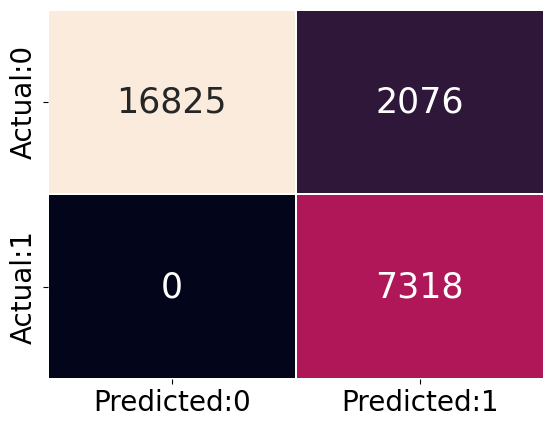

In [79]:
# create a confusion matrix
cm = cm=confusion_matrix(y_test,y_pred_ini,labels=nbmodel_ini.classes_)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd',cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# F1 Score

In [80]:
#Using F1 Score we are checking the accuracy on the testing dataset
target_names= ["Negative(0)","Positive(1)"]
# Classification Report
print(classification_report(y_test,nbmodel_ini.predict(x_test),target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       1.00      0.89      0.94     18901
 Positive(1)       0.78      1.00      0.88      7318

    accuracy                           0.92     26219
   macro avg       0.89      0.95      0.91     26219
weighted avg       0.94      0.92      0.92     26219



# Log Loss

In [81]:
#Using Logloss we are checking the accuracy on the testing dataset
log_loss(y_test,nbmodel_ini.predict(x_test))

2.7348167268049766

# Comparing the Training and Testing Accuracies

In [82]:
#Storing the predicted values of training dataset in y_pred_train
y_pred_train = nbmodel_ini.predict(x_train)

In [83]:
#Checking the accuracy of training dataset 
accuracy_score(y_train,y_pred_train)

0.9218987527992546

In [84]:
#Checking the accuracy of testing dataset
accuracy_score(y_test,y_pred_ini)

0.9208207788245165

**Conclusion:** As there is very less difference between the accuracy of training and testing dataset we are good to go with the model

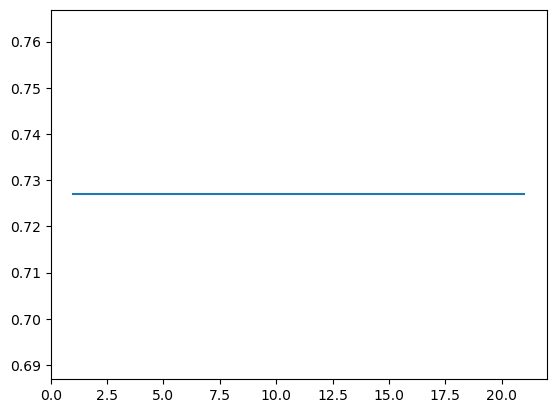

In [92]:
#Using K-fold cross validation technique we will find the best value of laplace smoothing
var_smoothing = [1,3,5,7,9,11,13,15,17,19,21]
from sklearn.model_selection import cross_val_score
cv_score = []

for v in var_smoothing:
    nbmodel = GaussianNB(var_smoothing=v)
    scores = cross_val_score(nbmodel, x_train,y_train,cv=3, scoring='accuracy')
    cv_score.append(scores.mean())
    
cv_score
plt.plot(var_smoothing, cv_score)
plt.show()

In [85]:
#Applying the Naive Bayes on the training dataset
from sklearn.naive_bayes import GaussianNB
nbmodel_tuned = GaussianNB(var_smoothing=1e-10)
nbmodel_tuned.fit(x_train,y_train)

GaussianNB(var_smoothing=1e-10)

In [86]:
#Running the model on the test dataset
y_pred_tuned = nbmodel_tuned.predict(x_test)

In [87]:
#Using accuracy score we are checking the accuracy on the testing dataset
accuracy_score(y_test,y_pred_tuned)

0.9210114802242648

In [88]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_auc_score, f1_score
score_card = pd.DataFrame(columns=['model_name','Accuracy Score','Precision Score','Recall Score','AUC Score','f1 Score'])

# append the result table for all performance scores

def update_score_card(y_test,y_pred,model_name):

    # assign 'score_card' as global variable
    global score_card
    
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels

    data = pd.DataFrame({'model_name':[model_name],
                                    'Accuracy Score' : [accuracy_score(y_test, y_pred)],
                                    'Precision Score': [precision_score(y_test, y_pred,zero_division=0)],
                                    'Recall Score': [recall_score(y_test, y_pred,zero_division=0)],
                                    'AUC Score': [roc_auc_score(y_test, y_pred)],
                                    'f1 Score': [f1_score(y_test, y_pred,zero_division=0)]}) 
    
    score_card = pd.concat([score_card, data], ignore_index=True)                              

In [89]:
update_score_card(y_test,y_pred_ini,'initial_model')

In [90]:
update_score_card(y_test,y_pred_tuned,'tuned_model')

In [95]:
score_card

model_name  Accuracy Score  Precision Score  Recall Score  AUC Score  \
0  initial_model        0.920821         0.779008           1.0   0.945082   
1    tuned_model        0.921011         0.779423           1.0   0.945215   

   f1 Score  
0  0.875778  
1  0.876040

**Interpretation - There is no change in the model accuracy after introducting the hyper parameter tuning technique.**